## Tensor and autograd

Tensor,张量

粗暴认为它是一个数组，支持高效的科学计算，和numpy中的ndarrays类似

从接口API的角度，对tensor的操作分为两类
- torch.function : torch.save 
- tensor.funciton: tensor.view

从存储的角度，对tensor的操作分为两类
- donnot change itself : a.add(b)
- change itself, inplace : a.add_(b)

generate one Tensor
- Tensor(*size) 
- ones
- zeros
- eye
- arange(s, e, step)
- rand / randn : random or 标准分布
- normal(mean, std)

In [1]:
import torch

In [2]:
a = torch.Tensor(2, 3)
a


        nan  4.5916e-41  0.0000e+00
 0.0000e+00  1.8401e+37  0.0000e+00
[torch.FloatTensor of size 2x3]

In [3]:
b = torch.Tensor([[1,2,3], [4,5,6]])
b


 1  2  3
 4  5  6
[torch.FloatTensor of size 2x3]

In [5]:
b.tolist() # change Tensor to list

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]

In [6]:
b.size()

torch.Size([2, 3])

In [7]:
b.numel() # b number of elements in b

6

In [8]:
c = torch.Tensor(b.size()) # c with the same size as b
d = torch.Tensor((2,3))
c, d

(
 1.00000e-45 *
   1.4013  0.0000  1.4013
   0.0000  1.4013  0.0000
 [torch.FloatTensor of size 2x3], 
  2
  3
 [torch.FloatTensor of size 2])

In [9]:
b.shape # same as b.size()

torch.Size([2, 3])

In [13]:
c.shape

torch.Size([2, 3])

In [14]:
torch.ones(2, 3)


 1  1  1
 1  1  1
[torch.FloatTensor of size 2x3]

In [15]:
torch.zeros(2, 3)


 0  0  0
 0  0  0
[torch.FloatTensor of size 2x3]

In [16]:
torch.arange(1, 6, 2)


 1
 3
 5
[torch.FloatTensor of size 3]

In [17]:
torch.linspace(1, 10, 3)


  1.0000
  5.5000
 10.0000
[torch.FloatTensor of size 3]

In [18]:
torch.randn(2,3)


-0.0035  0.9841 -0.4429
 0.6638 -0.4723 -0.2171
[torch.FloatTensor of size 2x3]

In [19]:
torch.rand(2,3)


 0.2333  0.3416  0.4226
 0.6209  0.7170  0.6326
[torch.FloatTensor of size 2x3]

In [20]:
torch.randperm(5) # random sorting for 5 element


 4
 0
 2
 1
 3
[torch.LongTensor of size 5]

In [21]:
torch.eye(2,3)


 1  0  0
 0  1  0
[torch.FloatTensor of size 2x3]

In [22]:
torch.eye(4,3)


 1  0  0
 0  1  0
 0  0  1
 0  0  0
[torch.FloatTensor of size 4x3]

## 常用的Tensor操作

- tensor.view : 改变tensor的形状，返回的新tensor和原来的tensor共享内存， 并不会修改自身的数据
- squeeze or unsqueeze : 添加维度或者减少维度

In [24]:
a = torch.arange(0, 6)
a.view(2, 3)


 0  1  2
 3  4  5
[torch.FloatTensor of size 2x3]

In [26]:
b = a.view(-1, 2)
b


 0  1
 2  3
 4  5
[torch.FloatTensor of size 3x2]

In [27]:
b.unsqueeze(1)


(0 ,.,.) = 
  0  1

(1 ,.,.) = 
  2  3

(2 ,.,.) = 
  4  5
[torch.FloatTensor of size 3x1x2]

In [28]:
b.unsqueeze(-2)


(0 ,.,.) = 
  0  1

(1 ,.,.) = 
  2  3

(2 ,.,.) = 
  4  5
[torch.FloatTensor of size 3x1x2]

In [29]:
c = b.view(1,1,1,2,3)
c.squeeze(0)


(0 ,0 ,.,.) = 
  0  1  2
  3  4  5
[torch.FloatTensor of size 1x1x2x3]

In [31]:
c.squeeze() # squeeze all


 0  1  2
 3  4  5
[torch.FloatTensor of size 2x3]

In [33]:
a[1] = 100
b
# share memory


   0  100
   2    3
   4    5
[torch.FloatTensor of size 3x2]

In [36]:
b.resize_(1,3)


   0  100    2
[torch.FloatTensor of size 1x3]

In [38]:
b.resize_(3,3) # generate new memory space


   0.0000  100.0000    2.0000
   3.0000    4.0000    5.0000
   0.0000    0.0000    0.0000
[torch.FloatTensor of size 3x3]

索引支持

In [40]:
a = torch.randn(3, 4)
a


 0.7903  0.0037 -1.6036  0.6245
-1.8013  0.2796 -1.0926  0.1169
 0.6609  0.5842  0.9660  0.5513
[torch.FloatTensor of size 3x4]

In [41]:
a[0]


 0.7903
 0.0037
-1.6036
 0.6245
[torch.FloatTensor of size 4]

In [42]:
a[:,0]


 0.7903
-1.8013
 0.6609
[torch.FloatTensor of size 3]

In [43]:
a[0][2]

-1.6035573482513428

In [44]:
a[0, -1]

0.6244868040084839

In [45]:
a[:2]


 0.7903  0.0037 -1.6036  0.6245
-1.8013  0.2796 -1.0926  0.1169
[torch.FloatTensor of size 2x4]

In [46]:
a > 1


 0  0  0  0
 0  0  0  0
 0  0  0  0
[torch.ByteTensor of size 3x4]

In [47]:
a > 0.2


 1  0  0  1
 0  1  0  0
 1  1  1  1
[torch.ByteTensor of size 3x4]

In [48]:
a[a>0.2]


 0.7903
 0.6245
 0.2796
 0.6609
 0.5842
 0.9660
 0.5513
[torch.FloatTensor of size 7]

In [49]:
a[torch.LongTensor([0, 1])]


 0.7903  0.0037 -1.6036  0.6245
-1.8013  0.2796 -1.0926  0.1169
[torch.FloatTensor of size 2x4]

In [50]:
a = torch.arange(0, 16).view(4,4)

In [51]:
a


  0   1   2   3
  4   5   6   7
  8   9  10  11
 12  13  14  15
[torch.FloatTensor of size 4x4]

gather

In [52]:
a = torch.arange(0, 16).view(4, 4)
a


  0   1   2   3
  4   5   6   7
  8   9  10  11
 12  13  14  15
[torch.FloatTensor of size 4x4]

In [53]:
index = torch.LongTensor([[0,1,2,3]])

In [56]:
# 对角线的元素
index = torch.LongTensor([[0,1,2,3]])
a.gather(0, index)


  0   5  10  15
[torch.FloatTensor of size 1x4]

In [57]:
# 取反对角线上的元素
index = torch.LongTensor([[3,2,1,0]]).t()
a.gather(1, index)


  3
  6
  9
 12
[torch.FloatTensor of size 4x1]

In [58]:
# 取反对角线上的元素
index = torch.LongTensor([[3,2,1,0]])
a.gather(0, index)


 12   9   6   3
[torch.FloatTensor of size 1x4]

In [60]:
# 选取两个对角线上的元素
index = torch.LongTensor([[0,1,2,3],[3,2,1,0]])
a.gather(0, index)


  0   5  10  15
 12   9   6   3
[torch.FloatTensor of size 2x4]

In [61]:
# 选取两个对角线上的元素
index = torch.LongTensor([[0,1,2,3],[3,2,1,0]]).t()
a.gather(1, index)


  0   3
  5   6
 10   9
 15  12
[torch.FloatTensor of size 4x2]

In [64]:
c = torch.zeros(4,4)
c.scatter_(1, index, b)

RuntimeError: Expected index [4 x 2] to be smaller size than src [3 x 3] and to be smaller than tensor [4 x 4] apart from dimension 1 at c:\anaconda2\conda-bld\pytorch_1519496000060\work\torch\lib\th\generic/THTensorMath.c:593

numpy风格的高级索引机制

In [65]:
x = torch.arange(0, 27).view(3,3,3)

In [66]:
x[1,1,2], x[2,2,0]

(14.0, 24.0)

In [67]:
x[[1,2],[1,2],[2,0]]


 14
 24
[torch.FloatTensor of size 2]

In [68]:
x[[2,1,0], [0], [1]]


 19
 10
  1
[torch.FloatTensor of size 3]

Tensor的类型
- torch.FloatTensor
- torch.DoubleTensor

In [70]:
a = torch.Tensor(2,3)
a


1.00000e-45 *
  0.0000  0.0000  4.2039
  0.0000  1.4013  0.0000
[torch.FloatTensor of size 2x3]

In [73]:
b = a.int()

In [74]:
b


 0  0  0
 0  0  0
[torch.IntTensor of size 2x3]

### 逐元素操作
输出和输入的形状相同
- abs/sqrt/div/exp/fmod/log
- cos/sin/asin/atan2/cosh
- ceil/round/floor/cosh
- clamp
- sigmoid/tanh

In [75]:
a = torch.arange(0, 6).view(2,3)
torch.cos(a)


 1.0000  0.5403 -0.4161
-0.9900 -0.6536  0.2837
[torch.FloatTensor of size 2x3]

In [76]:
a


 0  1  2
 3  4  5
[torch.FloatTensor of size 2x3]

In [77]:
a % 3


 0  1  2
 0  1  2
[torch.FloatTensor of size 2x3]

In [78]:
torch.fmod(a, 3)


 0  1  2
 0  1  2
[torch.FloatTensor of size 2x3]

In [79]:
a ** 2


  0   1   4
  9  16  25
[torch.FloatTensor of size 2x3]

In [80]:
torch.pow(a, 2)


  0   1   4
  9  16  25
[torch.FloatTensor of size 2x3]

### 归并操作
- mean/sum/median/mode
- norm/dist
- std/var
- cumsum/cumprod 累加/累乘

使得输出形状小于输入形状，并按照某一个维度进行指定的操作

关于dim参数，加入输入的形状为(m, n, k)
- dim is 0, output size is (1,n,k) or (n,k)
- dim is 1, output size is (m,1,k) or (m,k)
- dim is 2, output size is (m,n,k) or (m,n)

关于keepdim，为True则保留1的维度，默认不保留

In [81]:
b = torch.ones(2, 3)
b


 1  1  1
 1  1  1
[torch.FloatTensor of size 2x3]

In [82]:
b.sum(dim=0, keepdim=True)


 2  2  2
[torch.FloatTensor of size 1x3]

In [83]:
b.sum(dim=0, keepdim=False)


 2
 2
 2
[torch.FloatTensor of size 3]

In [84]:
b.sum(dim=1)


 3
 3
[torch.FloatTensor of size 2]

In [86]:
a = torch.arange(0, 6).view(2,3)
a


 0  1  2
 3  4  5
[torch.FloatTensor of size 2x3]

In [87]:
a.cumsum(dim=1)


  0   1   3
  3   7  12
[torch.FloatTensor of size 2x3]

In [88]:
a ** 2


  0   1   4
  9  16  25
[torch.FloatTensor of size 2x3]

比较操作
- gt/lt/ge/le/eq/ne
- topk
- sort
- max/min

In [89]:
a = torch.linspace(0, 15, 6).view(2,3)
a


  0   3   6
  9  12  15
[torch.FloatTensor of size 2x3]

In [90]:
b = torch.linspace(15, 0, 6).view(2,3)
b


 15  12   9
  6   3   0
[torch.FloatTensor of size 2x3]

In [91]:
torch.max(a)

15.0

In [92]:
torch.max(b, dim=1)

(
  15
   6
 [torch.FloatTensor of size 2], 
  0
  0
 [torch.LongTensor of size 2])

两个返回值，第一行和第二行的最大值，最大值分别是这一行的第几个元素

In [93]:
torch.clamp(a, min=10)


 10  10  10
 10  12  15
[torch.FloatTensor of size 2x3]

### 线性代数

|name|func|
| --------   | -----:   | :----: |
|trace|对角线元素之和|

|diag
- triu
- mm/bmm
- addmm/addbmm/addmv
- t
- dot/cross
- inverse
- svd

### Tensor和numpy之间进行转换

In [94]:
import numpy as np
a = np.ones([2,3])
a

array([[1., 1., 1.],
       [1., 1., 1.]])

In [95]:
b = torch.from_numpy(a)
b


 1  1  1
 1  1  1
[torch.DoubleTensor of size 2x3]

In [96]:
b = torch.Tensor(a)
b


 1  1  1
 1  1  1
[torch.FloatTensor of size 2x3]

In [97]:
a[0, 1] = 100
b


 1  1  1
 1  1  1
[torch.FloatTensor of size 2x3]

In [98]:
b[0, 1] = 100
b


   1  100    1
   1    1    1
[torch.FloatTensor of size 2x3]

In [101]:
c = b.numpy()
c

array([[  1., 100.,   1.],
       [  1.,   1.,   1.]], dtype=float32)

In [103]:
# b and c share memory
c[0, 1] = 200
b


   1  200    1
   1    1    1
[torch.FloatTensor of size 2x3]

### Tensor的内部结构
分为信息区Tensor和存储区Storage
- Tensor:size, stride, type
- Storage

In [104]:
a = torch.arange(0, 6)
a.storage()

 0.0
 1.0
 2.0
 3.0
 4.0
 5.0
[torch.FloatStorage of size 6]

In [105]:
b = a.view(2, 3)
b.storage()

 0.0
 1.0
 2.0
 3.0
 4.0
 5.0
[torch.FloatStorage of size 6]

In [106]:
# the id of the object is the memory address of this object
id(b.storage()) == id(a.storage())

True

In [107]:
a[1] = 100
b


   0  100    2
   3    4    5
[torch.FloatTensor of size 2x3]

In [108]:
c = a[2:]
c.storage()

 0.0
 100.0
 2.0
 3.0
 4.0
 5.0
[torch.FloatStorage of size 6]

In [109]:
c


 2
 3
 4
 5
[torch.FloatTensor of size 4]

In [110]:
c.data_ptr()

3086690127048

In [112]:
a.data_ptr()

3086690127040

data_ptr()会返回tensor首元素的内存地址，相差8是因为2个float

In [113]:
c[0] = -100
a


   0
 100
-100
   3
   4
   5
[torch.FloatTensor of size 6]

In [115]:
d = torch.Tensor(c.storage())
d[0] = 6666
c


-100
   3
   4
   5
[torch.FloatTensor of size 4]

In [116]:
b


 6666   100  -100
    3     4     5
[torch.FloatTensor of size 2x3]

可以看到下面的几个tensor都是共享

In [117]:
id(a.storage()) == id(b.storage()) == id(c.storage()) == id(d.storage())

True

In [118]:
a.storage_offset(), b.storage_offset(), c.storage_offset()

(0, 0, 2)

绝大多操作并不修改storage信息，而是改变tensor的头部信息，节省内存，并且提升了处理速度。

一般高级索引都不和原来的tensor共享内存，但是普通索引则可以。

即numpy风格的高级索引。

因为普通索引可以通过修改tensor头部信息（offset，stride，size）

### Tensor持久化

torch.save

torch.load

load时可以将GPU tenosr指定映射到CPU或者GPU上

In [119]:
torch.cuda.is_available()

True

In [121]:
a = a.cuda(0)

In [122]:
torch.save(a, 'a.pth')

In [123]:
# load a, b is GPU 0
b = torch.load('a.pth')

In [124]:
# load a, c is CPU
c = torch.load('a.pth', map_location=lambda storage, loc : storage)

In [126]:
b


 6666
  100
 -100
    3
    4
    5
[torch.cuda.FloatTensor of size 6 (GPU 0)]

#### Tensor的向量化

向量化计算是一种特殊的并行化计算方式。

一般程序在同一个时间只会执行一个操作，

向量化计算能够在同一时间执行多个操作，通常是对不同的数据执行同样的一个或者一批指令，即将指令应用在一个数组/向量上。

常见即是避免使用for循环

In [129]:
def for_loop_add(x, y):
    result = []
    for i, j in zip(x, y):
        result.append(i+j)
    return torch.Tensor(result)

In [136]:
x = torch.zeros(100)
y = torch.zeros(100)
%timeit -n 10 for_loop_add(x, y)
%timeit -n 10 x + y

154 µs ± 20.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 15.32 times longer than the fastest. This could mean that an intermediate result is being cached.
8.12 µs ± 9.26 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


可以看到有超过10倍的差异，实际使用中要尽量使用内建函数（builtin-function），函数由底层的C/C++实现，经由底层优化实现高效计算。

使用 torch.set_num_threads设置多线程并行计算时所占用的线程数，从而限制所占用的CPU数目。

使用 torch.set_printoptions来设置打印tensor时的数值精度和格式。

## Linear regression

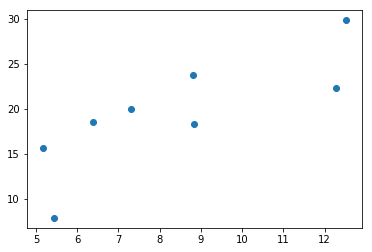

In [140]:
import torch
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display


# set random seed
# to confirm same result in different computers

torch.manual_seed(1000)

def get_fake_data(batch_size=8):
    ''' random data y = x * 2 + 3 '''
    x = torch.rand(batch_size, 1)*20
    y = x * 2 + (1 + torch.randn(batch_size, 1))*3
    return x, y

x, y = get_fake_data()

plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())

In [141]:
# init parameters
w = torch.rand(1, 1)
b = torch.zeros(1,1)
lr = 0.001



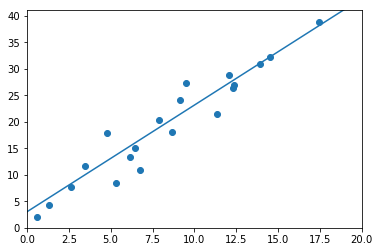

2.0116281509399414 3.018310308456421


In [143]:

for ii in range(20000):
    x, y = get_fake_data()

    # forward
    y_pred = x.mm(w) + b.expand_as(y)
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()

    # backward
    dloss = 1
    dy_pred = dloss * (y_pred - y)
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()

    # update parameters
    w.sub_(lr * dw)
    b.sub_(lr * db)

    if ii % 1000 == 0:
        # draw
        display.clear_output(wait=True)
        x = torch.arange(0, 20).view(-1, 1)
        y = x.mm(w) + b.expand_as(x)
        plt.plot(x.numpy(), y.numpy()) # predicted

        x2, y2 = get_fake_data(batch_size=20)
        plt.scatter(x2.numpy(), y2.numpy()) # true data

        plt.xlim(0, 20)
        plt.ylim(0, 41)
        plt.show()
        plt.pause(0.5)
        
        print(w.squeeze()[0], b.squeeze()[0])

# 第二部分autograd

计算图是现代深度学习框架的核心，为自动求导算法--反向传播（Back Propogation）

#### Variable
Variable封装了tensor，并记录对tensor的操作记录来构建计算图，主要包含三个属性
- data: variable所包含的tensor
- grad: 保存data对应的梯度，grad也是variable，和data的形状一致
- grad_fn: 指向一个Function，记录tensor的操作历史，即是什么操作的输出

构造函数需要传入tensor，同时有两个参数可以选择。
- requires_grad(bool):是否要对该Variable进行求导
- volatile（bool):挥发，构建在这个variable上面的图都不会求导，专为推理阶段设计

计算各个Variable的梯度，则只需要调用根节点variable的backward方法，autograd会自动沿着计算图反向传播，计算每一个叶子节点的梯度。

variable.backward(grad_variables=None, retain_graph=None, create_graph=None)
- grad_variable:
- retain_graph:
- create_graph:对反向传播过程再次构建计算图

In [144]:
from torch.autograd import Variable

In [145]:
a = Variable(torch.ones(3,4), requires_grad=True)
a

Variable containing:
 1  1  1  1
 1  1  1  1
 1  1  1  1
[torch.FloatTensor of size 3x4]

In [146]:
b = Variable(torch.zeros(3, 4))
b

Variable containing:
 0  0  0  0
 0  0  0  0
 0  0  0  0
[torch.FloatTensor of size 3x4]

In [147]:
c = a+b
c

Variable containing:
 1  1  1  1
 1  1  1  1
 1  1  1  1
[torch.FloatTensor of size 3x4]

In [149]:
d = c.sum()
d

Variable containing:
 12
[torch.FloatTensor of size 1]

In [152]:
d.backward()
a.grad

Variable containing:
 1  1  1  1
 1  1  1  1
 1  1  1  1
[torch.FloatTensor of size 3x4]

In [153]:
a.requires_grad

True

In [155]:
# 是否为叶子结点
a.is_leaf

True

## Test Grad

In [156]:
def f(x):
    '''compute y'''
    y = x ** 2 * torch.exp(x)
    return y

def gardf(x):
    '''by hand'''
    dx = 2*x*torch.exp(x) + x**2*torch.exp(x)
    return dx

In [157]:
x = Variable(torch.randn(3,4), requires_grad=True)
y = f(x)
y

Variable containing:
 0.5354  0.1078  8.1789  0.4551
 1.0608  0.0260  2.5683  0.3988
 0.4398  2.8664  0.1772  0.2013
[torch.FloatTensor of size 3x4]

In [158]:
y.backward(torch.ones(y.size()))
x.grad

Variable containing:
 -0.0604  -0.4295  19.7654  -0.2569
  4.0117  -0.2694   7.8032  -0.3343
 -0.2805   8.4989  -0.4604  -0.4608
[torch.FloatTensor of size 3x4]

In [159]:
gardf(x)

Variable containing:
 -0.0604  -0.4295  19.7654  -0.2569
  4.0117  -0.2694   7.8032  -0.3343
 -0.2805   8.4989  -0.4604  -0.4608
[torch.FloatTensor of size 3x4]

they are the same as showed above

In [160]:
x = Variable(torch.ones(1))
b = Variable(torch.rand(1), requires_grad = True)
w = Variable(torch.rand(1), requires_grad = True)
y = w * x
z = y + b

autograd会跟随用户的操作，记录生成当前variable的所有操作，并构建出一个有向无环图。每次进行一个操作，相应的计算图就会发生改变。链式法则，计算输入的各个Variable的梯度。每一个前向操作的函数

In [161]:
x.requires_grad

False

In [162]:
b.requires_grad

True

In [164]:
w.requires_grad

True

In [165]:
y.requires_grad

True

In [166]:
x.is_leaf, w.is_leaf, b.is_leaf

(True, True, True)

In [167]:
y.is_leaf, z.is_leaf

(False, False)

In [168]:
z.grad_fn

In [169]:
z.grad_fn.next_functions

((<MulBackward1 at 0x2ce9512d710>, 0), (<AccumulateGrad at 0x2ce9512d6a0>, 0))

In [171]:
z.grad_fn.next_functions[0][0] == y.grad_fn

True

In [172]:
w.grad_fn, x.grad_fn

(None, None)

In [175]:
y.grad_fn

In [176]:
y.grad_fn.next_functions

((<AccumulateGrad at 0x2ce950b95c0>, 0), (None, 0))

In [177]:
y.grad_fn.saved_variables

AttributeError: 'MulBackward1' object has no attribute 'saved_variables'

反向传播过程中非叶子结点的导师计算完之后即会被清空。
- autograd.grad
- hook

实际使用的过程要避免修改grad的值

In [178]:
x = Variable(torch.ones(3), requires_grad=True)
w = Variable(torch.ones(3), requires_grad=True)
y = x * w
# y 是依赖于w
z = y.sum()
x.requires_grad, w.requires_grad, y.requires_grad

(True, True, True)

In [179]:
z.backward()
(x.grad, w.grad, y.grad)

(Variable containing:
  1
  1
  1
 [torch.FloatTensor of size 3], Variable containing:
  1
  1
  1
 [torch.FloatTensor of size 3], None)

##### 第一种方法：使用grad获取中间变量的梯度

In [180]:
x = Variable(torch.ones(3), requires_grad=True)
w = Variable(torch.ones(3), requires_grad=True)
y = x * w
# y 是依赖于w
z = y.sum()
# z对y的梯度，隐式调用backward()
torch.autograd.grad(z, y)

(Variable containing:
  1
  1
  1
 [torch.FloatTensor of size 3],)

##### 第二种方法：使用hook

In [181]:
# hook是一个函数，输入为梯度
def variable_hook(grad):
    print('y的梯度：\r\n', grad)

x = Variable(torch.ones(3), requires_grad=True)
w = Variable(torch.ones(3), requires_grad=True)
y = x * w
# y 是依赖于w
z = y.sum()
# 注册hook
hook_handle = y.register_hook(variable_hook)
# BP
z.backward()
# 用完之后记得移除hook
hook_handle.remove()

y的梯度：
 Variable containing:
 1
 1
 1
[torch.FloatTensor of size 3]



In [183]:
x = Variable(torch.arange(3), requires_grad=True)
y = x ** 2 + x * 2
z = y.sum()
z.backward()
x.grad

Variable containing:
 2
 4
 6
[torch.FloatTensor of size 3]

In [184]:
x = Variable(torch.arange(3), requires_grad=True)
y = x ** 2 + x * 2
z = y.sum()
y_grad_variables = Variable(torch.Tensor([1,1,1])) # dz/dy
y.backward(y_grad_variables) # 从y开始进行反向传播
x.grad

Variable containing:
 2
 4
 6
[torch.FloatTensor of size 3]

只有对variable的操作才能够使用autograd

#### 扩展autograd

写一个function进行扩展

In [187]:
from torch.autograd import Function

class MultiplyAdd(Function):

    @staticmethod
    def forward(ctx, w, x, b):
        print('type in forward ', type(x))
        ctx.save_for_backward(w, x)
        output = w * x + b
        return output

    @staticmethod
    def backward(ctx, grad_output):
        w, x = ctx.saved_variables
        print('type in backward ', type(x))
        grad_w = grad_output * x
        grad_x = grad_output * w
        grad_b = grad_output * 1
        return grad_w, grad_x, grad_b

In [188]:
x = Variable(torch.ones(1))
w = Variable(torch.rand(1), requires_grad=True)
b = Variable(torch.rand(1), requires_grad=True)
print('start forward propagation')
z = MultiplyAdd.apply(w, x, b)
print('start back propagation')
z.backward()

# show grad
x.grad, w.grad, b.grad

type in backward start forward propagation <class 'torch.autograd.variable.Variable'>

type in forward  <class 'torch.FloatTensor'>
start back propagation


(None, Variable containing:
  1
 [torch.FloatTensor of size 1], Variable containing:
  1
 [torch.FloatTensor of size 1])

In [189]:
x = Variable(torch.ones(1))
w = Variable(torch.rand(1), requires_grad=True)
b = Variable(torch.rand(1), requires_grad=True)
print('start forward propagation')
z = MultiplyAdd.apply(w, x, b)
print('start back propagation')

# 调用MultiplyAdd.backward
# 输出grad_w, grad_x, grad_b
z.grad_fn.apply(Variable(torch.ones(1)))

start forward propagation
type in forward  <class 'torch.FloatTensor'>
start back propagation
type in backward  <class 'torch.autograd.variable.Variable'>


(Variable containing:
  1
 [torch.FloatTensor of size 1], Variable containing:
  0.3917
 [torch.FloatTensor of size 1], Variable containing:
  1
 [torch.FloatTensor of size 1])

forwad函数的输入为tensor，而backward函数的输入则是variable，为了实现高阶求导。backward函数的输入和返回值都是Variable。

In [190]:
x = Variable(torch.Tensor([5]), requires_grad=True)
y = x ** 2
grad_x = torch.autograd.grad(y, x, create_graph=True)
grad_x

(Variable containing:
  10
 [torch.FloatTensor of size 1],)

In [191]:
grad_grad_x = torch.autograd.grad(grad_x[0], x)

In [192]:
grad_grad_x

(Variable containing:
  2
 [torch.FloatTensor of size 1],)

#### 利用这种方法实现Sigmoid的方法

In [197]:
class Sigmoid(Function):

    @staticmethod
    def forward(ctx, x):
        output = 1 / (1 + torch.exp(-x))
        ctx.save_for_backward(output)
        return output
    
    @staticmethod
    def backward(ctx, grad_output):
        output,  = ctx.saved_variables
        grad_x = output + (1 - output) * grad_output
        return grad_x

In [200]:
test_input = Variable(torch.randn(3,4), requires_grad=True)
# 使用数值逼近的方法不断检验计算梯度的公式是否正确
torch.autograd.gradcheck(Sigmoid.apply, (test_input, ), eps=1e-3)

RuntimeError: for output no. 0,
 numerical:(

Columns 0 to 9 
 0.2497  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.2490  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.2315  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0868  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.2270  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.1063  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.2413  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0699  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.2203  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.1996
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000

Columns 10 to 11 
 0.0000  0.0000
 0.0000  0.0000
 0.0000  0.0000
 0.0000  0.0000
 0.0000  0.0000
 0.0000  0.0000
 0.0000  0.0000
 0.0000  0.0000
 0.0000  0.0000
 0.0000  0.0000
 0.2377  0.0000
 0.0000  0.1113
[torch.FloatTensor of size 12x12]
,)
analytical:(

Columns 0 to 9 
 1.0000  0.5167  0.5167  0.5167  0.5167  0.5167  0.5167  0.5167  0.5167  0.5167
 0.5311  1.0000  0.5311  0.5311  0.5311  0.5311  0.5311  0.5311  0.5311  0.5311
 0.3640  0.3640  1.0000  0.3640  0.3640  0.3640  0.3640  0.3640  0.3640  0.3640
 0.9041  0.9041  0.9041  1.0000  0.9041  0.9041  0.9041  0.9041  0.9041  0.9041
 0.6515  0.6515  0.6515  0.6515  1.0000  0.6515  0.6515  0.6515  0.6515  0.6515
 0.8791  0.8791  0.8791  0.8791  0.8791  1.0000  0.8791  0.8791  0.8791  0.8791
 0.5933  0.5933  0.5933  0.5933  0.5933  0.5933  1.0000  0.5933  0.5933  0.5933
 0.0756  0.0756  0.0756  0.0756  0.0756  0.0756  0.0756  1.0000  0.0756  0.0756
 0.6724  0.6724  0.6724  0.6724  0.6724  0.6724  0.6724  0.6724  1.0000  0.6724
 0.7245  0.7245  0.7245  0.7245  0.7245  0.7245  0.7245  0.7245  0.7245  1.0000
 0.3889  0.3889  0.3889  0.3889  0.3889  0.3889  0.3889  0.3889  0.3889  0.3889
 0.8725  0.8725  0.8725  0.8725  0.8725  0.8725  0.8725  0.8725  0.8725  0.8725

Columns 10 to 11 
 0.5167  0.5167
 0.5311  0.5311
 0.3640  0.3640
 0.9041  0.9041
 0.6515  0.6515
 0.8791  0.8791
 0.5933  0.5933
 0.0756  0.0756
 0.6724  0.6724
 0.7245  0.7245
 1.0000  0.3889
 0.8725  1.0000
[torch.FloatTensor of size 12x12]
,)
